In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
import seaborn as sns
from scipy import constants

#ADD
!pip install factor_analyzer
from sklearn import linear_model
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# from factor_analyzer import FactorAnalyzer
# from prince import MFA
# !pip install prince
# from sklearn.decomposition import FactorAnalysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# # Importation du Dataset
# filename=(r'C:\Users\ov045060\Downloads\IFI_DOCUMENTS\Data Mining\TP1Binome9\Fraud_Detection.xlsx')
# #Creation du dataFrame and read excel file with read_excel file function
# df = pd.read_excel(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fraud_file = '/content/drive/MyDrive/TP2FD_BINOME9/TP1Binome9/Fraud_Detection.xlsx'
df = pd.read_excel (fraud_file )
#df = pd.read_excel (fraud_file ))

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
2,1,PAYMENT,8586.98,C1305004711,3763.0,0.00,M494077446,0.0,0.0,0,0
3,1,PAYMENT,871.75,C1003206025,19869.0,18997.25,M989889899,0.0,0.0,0,0
4,1,PAYMENT,1035.36,C806813022,71636.0,70600.64,M902860396,0.0,0.0,0,0


**ANALYSE GENERALE DE VARIABLES  DU DATASET**

In [ ]:
df.shape

(400, 11)

In [ ]:
#Attributs et Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            400 non-null    int64  
 1   type            400 non-null    object 
 2   amount          400 non-null    float64
 3   nameOrig        400 non-null    object 
 4   oldbalanceOrg   400 non-null    float64
 5   newbalanceOrig  400 non-null    float64
 6   nameDest        400 non-null    object 
 7   oldbalanceDest  400 non-null    float64
 8   newbalanceDest  400 non-null    float64
 9   isFraud         400 non-null    int64  
 10  isFlaggedFraud  400 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 34.5+ KB


In [ ]:
#verifie si nous avons pas des donnees manquantes ou null
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#reprensation graphique d'evaluation des donnees manquantes s'il y en a
sns.heatmap(df.isnull())

<Axes: >

In [ ]:
#Discovery of duplicate, fonction boolean return True pour les lignes ayant un doublons
print(df.duplicated())

**Verification de types d'attributs de notre dataset**

In [ ]:
df.dtypes

**Vérification des valeurs uniques dans chaque colonne**

In [ ]:
df.nunique()


***Listons les differents types de transactions que nous avons***

In [ ]:
df['type'].unique()

In [ ]:
df['type'].value_counts()

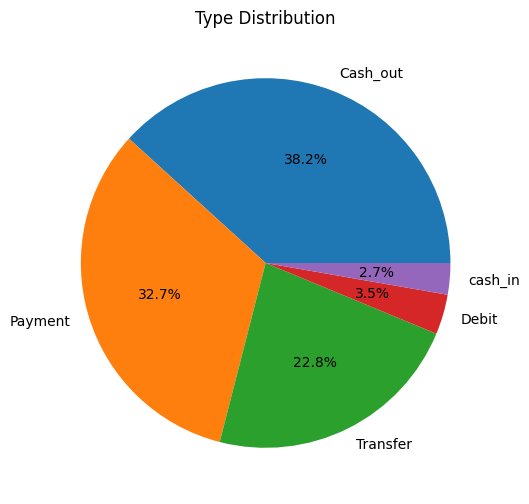

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df['type'].value_counts(), labels=['Cash_out','Payment', 'Transfer','Debit','cash_in'], autopct='%1.1f%%')
plt.title('Type Distribution')
plt.show()

**Affichage du nombre de transactions frauduleuse Et non Frauduleuse**

In [ ]:
# Count Fraud and non_Fraud transaction
df[['isFraud']].value_counts()

isFraud
0          299
1          101
dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

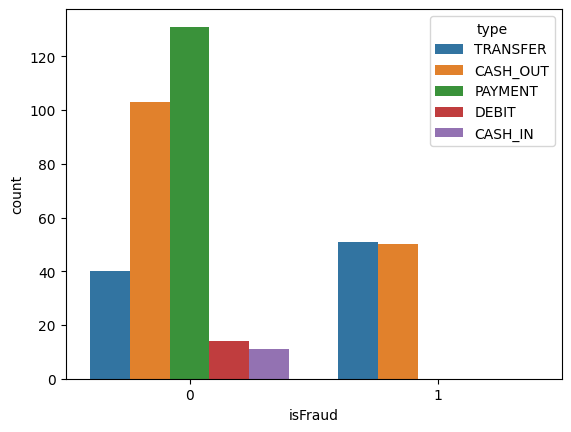

In [ ]:
#visualisation count by type de transaction
sns.countplot(x='isFraud',hue='type',data=df)

In [ ]:
# Effectuez un pivot pour utiliser les valeur de amount by step
stat_df = pd.pivot_table(df,index='step' ,values='amount' , aggfunc=['mean','min','max','median','std','count','sum','var'])
print(stat_df)



              mean       min          max      median           std  count  \
            amount    amount       amount      amount        amount amount   
step                                                                         
1     1.513038e+05      8.73   2545478.01   19162.080  3.310158e+05    319   
2     5.233241e+05  14949.84   1096187.24  491079.580  5.438274e+05      8   
3     1.670819e+04  10539.37     22877.00   16708.185  7.123134e+03      4   
4     2.640027e+06  13707.11  10000000.00  169941.730  4.049008e+06     10   
5     6.364026e+04  10119.47    120074.73   60726.570  4.922525e+04      6   
6     4.431226e+04  10224.00    216422.00   25975.860  5.932948e+04     22   
7     1.034558e+06    164.00   5460002.91  142081.770  2.073839e+06     12   
8     1.324200e+05    222.00   1078013.76   36399.930  3.024555e+05     12   
9     6.752305e+05  11308.00   2539898.07  361559.690  8.421330e+05      7   

              sum           var  
           amount        amou

Axes(0.125,0.11;0.775x0.77)


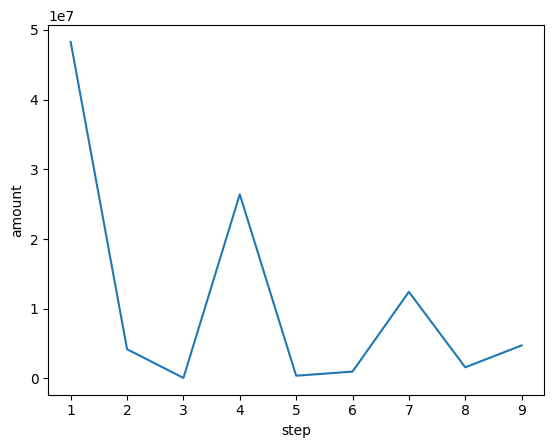

In [ ]:
#Representation graphique de la variable amount
df_amount =df[['step','amount']].groupby(by='step').sum()
# print(df_amount)
g =sns.lineplot(data=df_amount, x='step', y='amount')
print(g)


In [ ]:
#Analayse globale des variables quantitatives du dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.0
mean,1.980000,2.475167e+05,2.782134e+05,1.483222e+05,4.633567e+05,1.105370e+06,0.252500,0.0
std,2.149687,8.787671e+05,1.206773e+06,7.994791e+05,1.578734e+06,3.313786e+06,0.434991,0.0
min,1.000000,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,4.617670e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.000000,2.599019e+04,1.055219e+04,0.000000e+00,7.850000e+01,0.000000e+00,0.000000,0.0
75%,1.000000,1.726689e+05,4.538500e+04,7.953403e+03,2.601038e+05,4.277463e+05,1.000000,0.0
max,9.000000,1.000000e+07,1.293042e+07,6.309147e+06,1.493992e+07,1.916920e+07,1.000000,0.0


In [ ]:
#Analayse globale de la variable quantitative 'amount'
df.amount.describe()


count    4.000000e+02
mean     2.475167e+05
std      8.787671e+05
min      8.730000e+00
25%      4.617670e+03
50%      2.599019e+04
75%      1.726689e+05
max      1.000000e+07
Name: amount, dtype: float64

<Axes: ylabel='amount'>

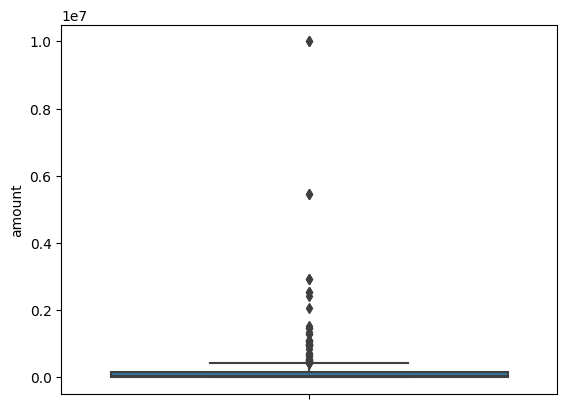

In [ ]:
#Histograme forme normalisee de amount (shapiro - WILK) avec densite estimee
#dans lequel les points dispersee sont consideres comme anormaux ou extremes par rapport aux autres avec boxplot
sns.boxplot(y = "amount", data = df)


<Axes: ylabel='amount'>

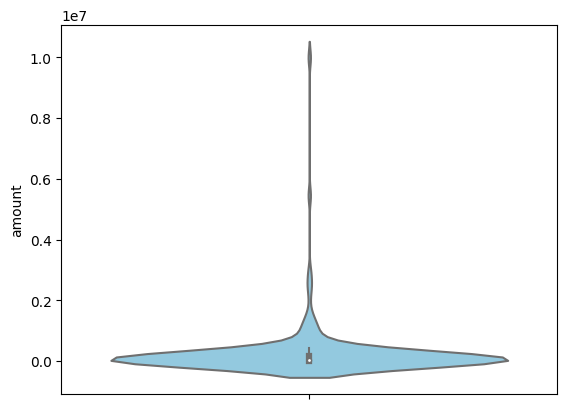

In [ ]:
#melange histograme avec boite a moustache pour une meilleure visualisation
sns.violinplot(y = "amount", data = df, color = "skyblue")

<ipython-input-479-9cb5683bf8c7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

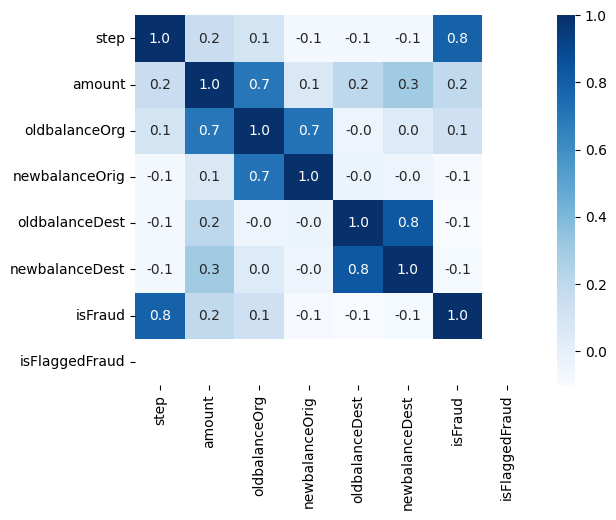

In [ ]:
# Tableau de correlation entre les variables quantitatives

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".1f")

1. ANALYSE DESCRIPTIVE

 * PAR TYPE

  - MIN FRAUD
  - MAX FRAUD
  - MOYENNE
  - SEUIL
  
  * PAR NAMEORIG
      CUSTOMER  MAX VICTIME (HOW TIME)

**Affichage de l'ensemble des transactions Frauduleuse**

In [ ]:
#Creer un nouveau frame avec les transactions frauduleuse
df_fraud = df[df['isFraud']==1]
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
154,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
155,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
303,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0


**Affichage d'analyse des variables quantitatives calculees**

In [ ]:
df_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101.000000,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,101.0,101.0
mean,4.881188,5.394751e+05,5.506268e+05,2.901404e+04,1.898106e+05,6.304333e+05,1.0,0.0
std,2.658146,1.626818e+06,1.814486e+06,2.915875e+05,1.341736e+06,2.166872e+06,0.0,0.0
min,1.000000,1.640000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
25%,2.000000,1.370711e+04,1.056500e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
50%,6.000000,2.970786e+04,2.597586e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
75%,7.000000,2.352387e+05,2.164220e+05,0.000000e+00,1.009700e+04,1.287445e+05,1.0,0.0
max,9.000000,1.000000e+07,1.293042e+07,2.930418e+06,1.301050e+07,1.307123e+07,1.0,0.0


**Analyse specifique de la variable amount**

In [ ]:
df_fraud['amount'].describe()

count    1.010000e+02
mean     5.394751e+05
std      1.626818e+06
min      1.640000e+02
25%      1.370711e+04
50%      2.970786e+04
75%      2.352387e+05
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:

#Create a pivot table and analyze data by type
pd.pivot_table(df_fraud,index='type' ,values='amount' , aggfunc=['mean','min','max','median','std','count'])

,mean,min,max,median,std,count
,amount,amount,amount,amount,amount,amount
type,,,,,,
CASH_OUT,512267.726400,164.0,10000000.0,30114.44,1.629718e+06,50
TRANSFER,566148.897255,164.0,10000000.0,29707.86,1.639741e+06,51


In [ ]:
# Aggregation of fraud transaction by step

pd.pivot_table(df_fraud,index='step' ,values='amount' , aggfunc=['mean','min','max','median','std','count'])

,mean,min,max,median,std,count
,amount,amount,amount,amount,amount,amount
step,,,,,,
1,1.873111e+05,181.00,1277212.77,22599.730,3.884363e+05,20
2,5.233241e+05,14949.84,1096187.24,491079.580,5.438274e+05,8
3,1.670819e+04,10539.37,22877.00,16708.185,7.123134e+03,4
4,2.640027e+06,13707.11,10000000.00,169941.730,4.049008e+06,10
5,6.364026e+04,10119.47,120074.73,60726.570,4.922525e+04,6
6,4.431226e+04,10224.00,216422.00,25975.860,5.932948e+04,22
7,1.034558e+06,164.00,5460002.91,142081.770,2.073839e+06,12
8,1.324200e+05,222.00,1078013.76,36399.930,3.024555e+05,12


**Affichage des clients avec nombres de fraudes**

In [ ]:
#Client les plus victimes de fraud
df_fraud['nameOrig'].value_counts().sort_values(ascending=False)

C1305486145    2
C2101527076    2
C840083671     2
C1420196421    2
C13692003      1
              ..
C1452168793    1
C58527359      1
C394488466     1
C1825456600    1
C1287719145    1
Name: nameOrig, Length: 97, dtype: int64

1. CORRELATION ENTRE DEUX VARIABLES ET TEST D'INDEPANDANCE

  a. Variables ( amount, isFraud)
  

In [ ]:
#Checking correlation entre deux variables
df[['amount','isFraud']].corr()

,amount,isFraud
amount,1.000000,0.193337
isFraud,0.193337,1.000000


**Creation de tableau de contingence entre isFraud et type**

isFraud,0,1,All
type,,,
CASH_IN,11,0,11
CASH_OUT,103,50,153
DEBIT,14,0,14
PAYMENT,131,0,131
TRANSFER,40,51,91
All,299,101,400


Text(0.5, 1.0, 'Number of Fraud by type')

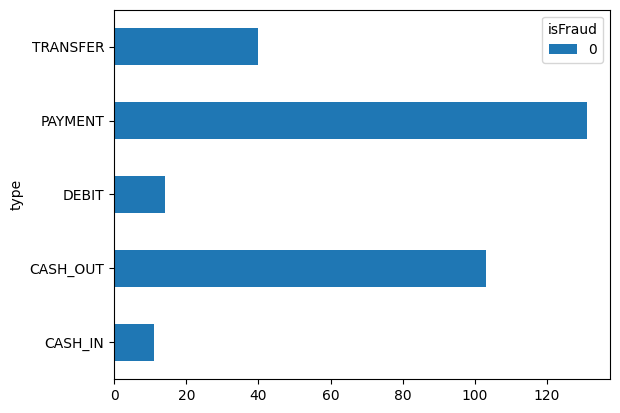

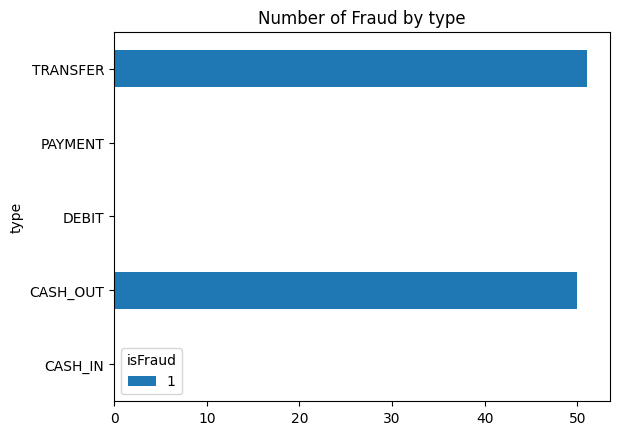

In [ ]:
#Representation du tableau effectifs de 'type' and isFraud and graphical reprentation

df_table = pd.crosstab(df.isFraud, df.type, margins=True).T
display(df_table)
df_table.iloc[:-1,[0]].plot(kind='barh')
df_table.iloc[:-1,[1]].plot(kind='barh')
plt.title('Number of Fraud by type')

**Type Distribution**

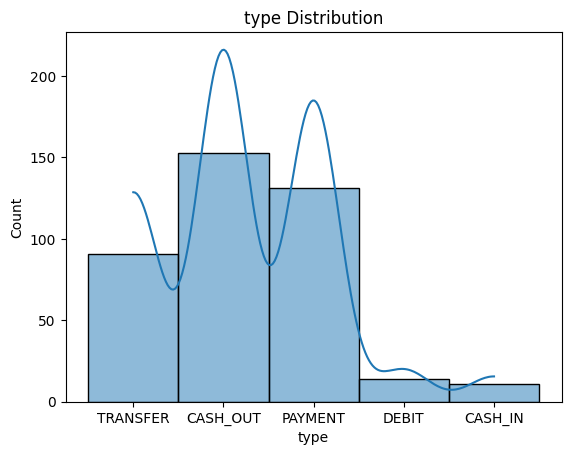

In [ ]:
sns.histplot(data=df, x='type', bins=20, kde=True)
plt.title('type Distribution')
plt.show()

**Realtion entre deux variables**

In [ ]:
# Test d’indépendance de deux caractères quantitatifs
contingency = pd.crosstab(df['isFraud'], df['type'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('p-value is:', p)
if p <= 0.05:
  print('Dependent (reject H0)')
else:
  print('Independent (H0 holds true)')


p-value is: 2.3850058213799782e-21
Dependent (reject H0)


In [ ]:
contingency = pd.crosstab(df['isFraud'], df['amount'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print('p-value is:', p)
if p <= 0.05:
   print('Dependent (reject H0)')
else:
   print('Independent (H0 holds true)')

p-value is: 0.03350763070927793
Dependent (reject H0)


In [ ]:
contingency = pd.crosstab(df['isFraud'], df['newbalanceOrig'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print('p-value is:', p)
if p <= 0.05:
   print('Dependent (reject H0)')
else:
   print('Independent (H0 holds true)')

p-value is: 0.9999993303380811
Independent (H0 holds true)


In [ ]:
contingency = pd.crosstab(df['isFraud'], df['oldbalanceOrg'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print('p-value is:', p)
if p <= 0.05:
   print('Dependent (reject H0)')
else:
   print('Independent (H0 holds true)')

p-value is: 1.2120392696295098e-12
Dependent (reject H0)


**Regression Logistique**

<Axes: xlabel='newbalanceOrig', ylabel='isFraud'>

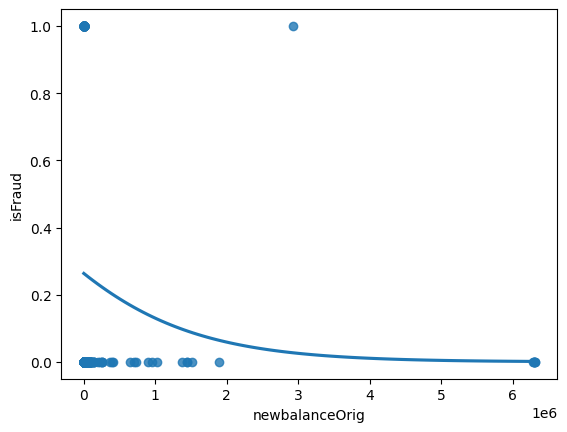

In [ ]:
input_labels =np.array(['newbalanceOrig'])
output_label =np.array (['isFraud'])

x_train = df[input_labels]

y_train = df[output_label]

sns.regplot(x=x_train, y=y_train, data=df, logistic=True, ci=None)

<Axes: xlabel='amount', ylabel='isFraud'>

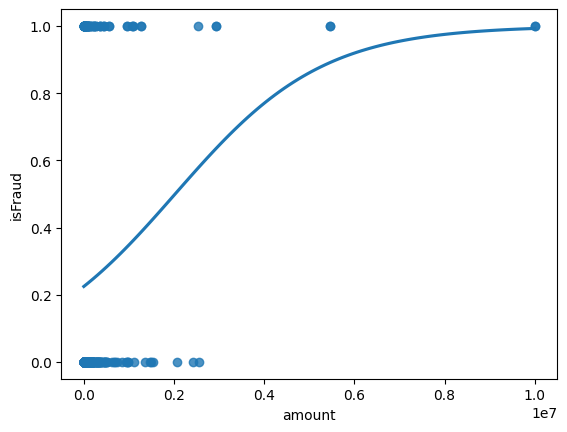

In [ ]:
input_labels =np.array(['amount'])
output_label =np.array (['isFraud'])

x_train = df[input_labels]

y_train = df[output_label]

sns.regplot(x=x_train, y=y_train, data=df, logistic=True, ci=None)

# Analyse en composante principale

In [ ]:
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

#standardisation des donnees
X_std = StandardScaler().fit_transform(X)


In [ ]:
#creation d'1 instance de la classe pca

pca = PCA()
pca.fit(X_std)


PCA()

In [ ]:
#calcul des val et vecteurs propres

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_


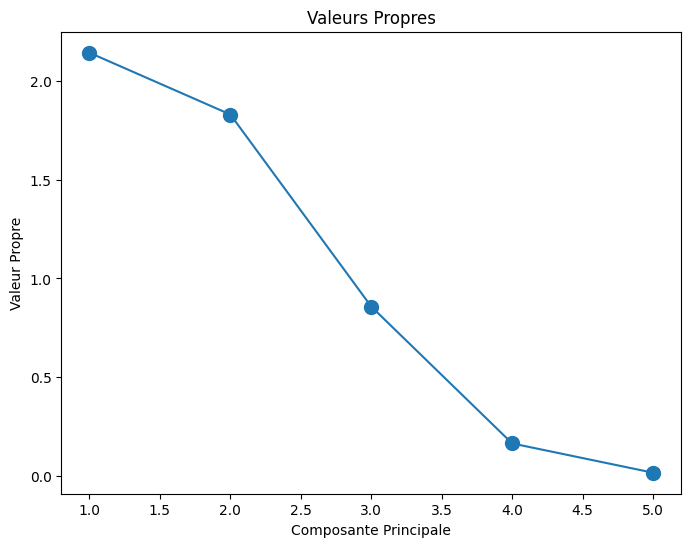

In [ ]:
#affichage des valeurs propres
# Tracer un graphique des valeurs propres
plt.figure(figsize=(8,6))
plt.scatter(np.arange(len(eigenvalues))+1, eigenvalues, s=100)
plt.plot(np.arange(len(eigenvalues))+1, eigenvalues)
plt.xlabel('Composante Principale')
plt.ylabel('Valeur Propre')
plt.title('Valeurs Propres')
plt.show()






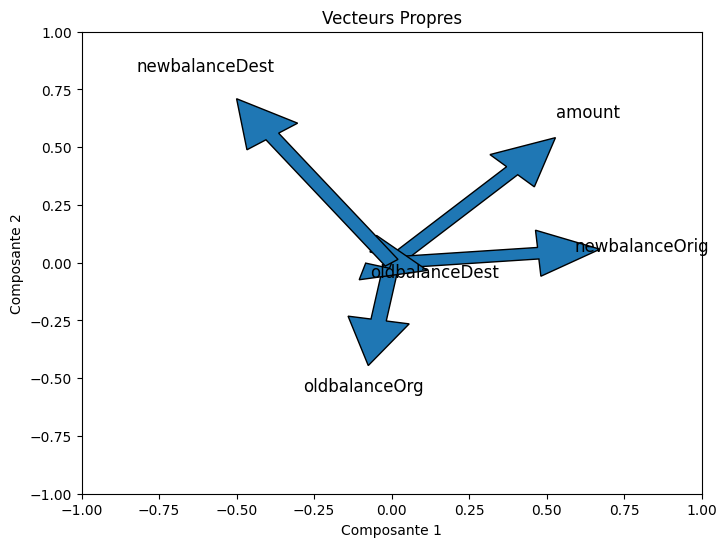

In [ ]:
#affichage des vecteurs propres

# Tracer un graphique des vecteurs propres
plt.figure(figsize=(8,6))
for i, ev in enumerate(eigenvectors):
    plt.arrow(0,0, ev[0], ev[1], width=0.05, head_width=0.2, head_length=0.2, length_includes_head=True)
    plt.text(ev[0]*1.2, ev[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.title('Vecteurs Propres')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()



In [ ]:
#importance de composantes principales


# Calculer la variance expliquée par chaque composante principale
variance_expliquee = pca.explained_variance_ratio_

# Calculer la variance cumulée
variance_cumulee = np.cumsum(variance_expliquee)

# Trouver le nombre de composantes principales qui expliquent au moins 70% de la variance totale
n_composantes = np.argmax(variance_cumulee >= 0.7) + 1

#print("Le nombre de composantes principales qui expliquent au moins 70% de la variance totale est :", n_composantes)

# Accéder aux vecteurs propres correspondant aux composantes principales retenues
composantes_retenues = pca.components_[:n_composantes,:]

# Afficher le nom de chaque composante principale retenue
noms_variables = ["amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]
for i in range(n_composantes):
    print("Composante principale", i+1, ":", noms_variables[np.argmax(np.abs(composantes_retenues[i,:]))])

Composante principale 1 : oldbalanceOrg
Composante principale 2 : oldbalanceDest


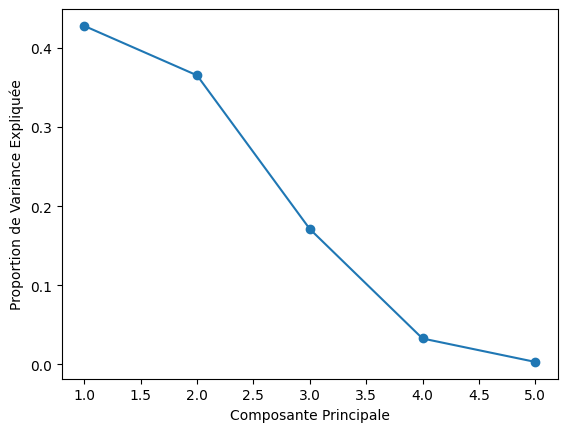

In [ ]:

plt.plot(range(1,len(variance_expliquee)+1), variance_expliquee, marker='o')
plt.xlabel('Composante Principale')
plt.ylabel('Proportion de Variance Expliquée')
plt.show()


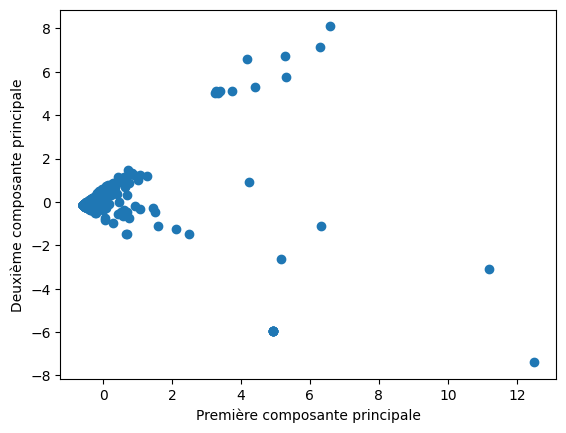

In [ ]:
#projection des donnees sur les composantes principales retenues
X_pca = pca.transform(X_std)
# Créer un graphique de dispersion des données projetées sur les deux premières composantes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()

# Classification Automatique : TP4

Methode de K-Means

In [ ]:


#Determinons le nombre optimal de cluster a utiliser via 'la methode du coude'


# from sklearn.cluster import KMeans

# # # Charger les données
# Y = df.values

# # # Initialiser une liste vide pour stocker les valeurs de l'inertie
# inertias = []

# # Tester différents nombres de clusters de 1 à 10
# K_range = range (1, 11)
# for k in K_range:
#     # Créer un objet de classification K-means avec k clusters
#     model = KMeans(n_clusters=k).fit(Y)
#     # Appliquer la classification K-means aux données
#     #model.fit(Y)
#     # Ajouter l'inertie du modèle à la liste
#     inertias.append(model.inertia_)

# # Afficher le graphique de la méthode du coude
# plt.plot(K_range, inertias)
# plt.title('Méthode du coude')
# plt.xlabel('Nombre de clusters')
# plt.ylabel("cout du modele (Inertia)")
# plt.show()


In [ ]:
# Charger les données et les prétraiter


# from sklearn.cluster import KMeans
# from sklearn.preprocessing import OneHotEncoder, StandardScaler


# df = pd.read_csv('data.csv')
# cat_vars = ['type', 'nameOrig', 'nameDest']
# encoder = OneHotEncoder()
# cat_data = encoder.fit_transform(df[cat_vars])
# num_vars = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
# scaler = StandardScaler()
# num_data = scaler.fit_transform(df[num_vars])
# X = pd.concat([pd.DataFrame(cat_data.toarray()), pd.DataFrame(num_data)], axis=1)

# Sélectionner un modèle et ajuster les paramètres
# model = KMeans(n_clusters=3, random_state=42)
# model.fit(X)

# Afficher les centres des clusters
# print('Centers of the clusters:', model.cluster_centers_)


In [ ]:
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=2)  # Remplacez K par le nombre de clusters souhaité
# kmeans.fit(X_pca)
# labels = kmeans.labels_

# print (labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

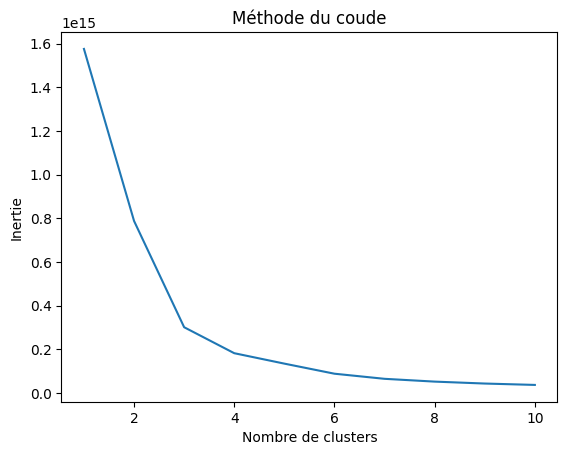

In [ ]:

#Determinons le nombre optimal de cluster a utiliser via 'la methode du coude'

from sklearn.cluster import KMeans

# Sélection des variables pertinentes
data_selected = df[['oldbalanceOrg', 'oldbalanceDest']]

# Implémentation de la méthode du coude
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_selected)
    inertias.append(kmeans.inertia_)

# Affichage du graphique de la méthode du coude
plt.plot(range(1, 11), inertias)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


In [ ]:
#classification kmeans

from sklearn.cluster import KMeans

# Sélection des variables pertinentes
data_selected = df[['oldbalanceOrg', 'oldbalanceDest']]

# Implémentation de la méthode K-means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_selected)

# Affichage des centres de chaque cluster
print(kmeans.cluster_centers_)


[[ 1.04346396e+05  2.33512149e+05]
 [ 7.16773424e+06 -5.82076609e-11]
 [ 5.52059727e+03  8.80378111e+06]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


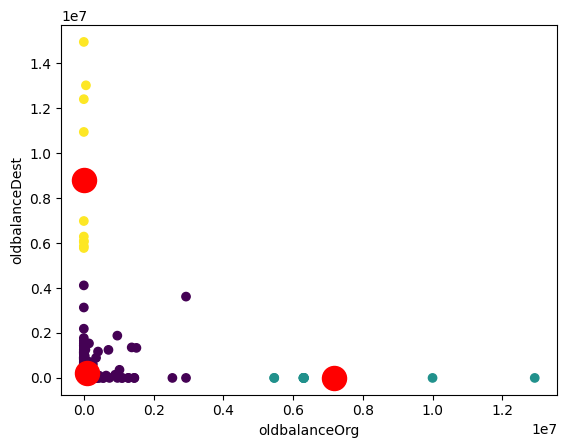

In [ ]:
#visualisation de la classification

import matplotlib.pyplot as plt

# Sélection des variables pertinentes
data_selected = df[['oldbalanceOrg', 'oldbalanceDest']]

# Implémentation de la méthode K-means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_selected)

# Visualisation des résultats de la classification
plt.scatter(data_selected.iloc[:, 0], data_selected.iloc[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('oldbalanceOrg')
plt.ylabel('oldbalanceDest')
plt.show()


#Clustering

<ipython-input-509-82a555009e58>:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method='ward')


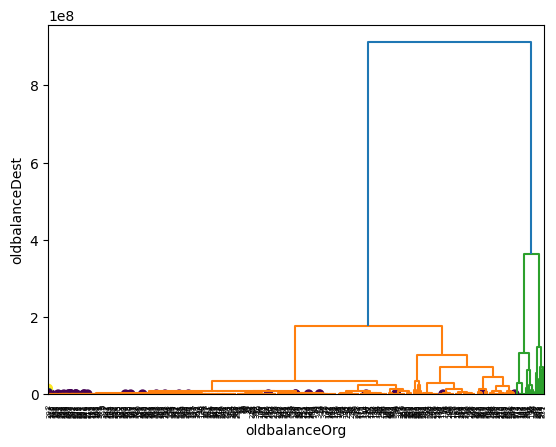

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt


# Sélectionner les deux composantes principales
X = df[['oldbalanceOrg', 'oldbalanceDest']].values

# Calculer la matrice de distance euclidienne
dist_matrix = np.linalg.norm(X[:, None] - X, axis=2)

# Effectuer la CAH avec la méthode de liaison de Ward
Z = linkage(dist_matrix, method='ward')

# Afficher le dendrogramme
dendrogram(Z)

# Couper le dendrogramme pour obtenir k groupes
k = 3
groups = fcluster(Z, k, criterion='maxclust')

# Afficher les groupes obtenus
plt.scatter(X[:, 0], X[:, 1], c=groups)
plt.xlabel('oldbalanceOrg')
plt.ylabel('oldbalanceDest')
plt.show()


**TEST PART**

# #TP5: Classification Supervisee

**Encoding categorical data**

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

**Pretraitement des donnnees**

In [ ]:
# # Normaliser les caractéristiques uniquement
# from sklearn.preprocessing import StandardScaler

# # Identification des types de variables
# var_num = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest' ]
# var_qual = ['type', 'nameOrig', 'nameDest']

# scaler = StandardScaler()
# df[var_num] = scaler.fit_transform(df[var_num])


df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
2,1,PAYMENT,8586.98,C1305004711,3763.0,0.00,M494077446,0.0,0.0,0,0
3,1,PAYMENT,871.75,C1003206025,19869.0,18997.25,M989889899,0.0,0.0,0,0
4,1,PAYMENT,1035.36,C806813022,71636.0,70600.64,M902860396,0.0,0.0,0,0


In [ ]:
df.shape

(400, 11)

In [ ]:

# Creation de la  Matrice d'independance des variables

XX = df.iloc[:, [1,9]].values  # var explicatives
yy = df.iloc[:, 9].values     #var cible

In [ ]:
#afficher le contenu de la var cible

print("yy = \t",yy)

yy = 	 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Encodage des variables categorielles**

In [ ]:
# Creation of the Matrix of the independante variable (Y = B + AX) same that the previous one

XX = df.iloc[:, 1:-1].values
yy = df.iloc[:, -1].values

print("XX = DATASET \n",XX, "\n\n")

XX = DATASET 
 [['TRANSFER' 181.0 'C1305486145' ... 0.0 0.0 1]
 ['CASH_OUT' 181.0 'C840083671' ... 21182.0 0.0 1]
 ['PAYMENT' 8586.98 'C1305004711' ... 0.0 0.0 0]
 ...
 ['CASH_OUT' 350705.74 'C58527359' ... 894760.68 1794033.65 1]
 ['TRANSFER' 2539898.07 'C394488466' ... 0.0 261290.69 1]
 ['TRANSFER' 361559.69 'C1287719145' ... 0.0 141302.12 1]] 




In [ ]:
XX.shape

(400, 9)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
2,1,PAYMENT,8586.98,C1305004711,3763.0,0.00,M494077446,0.0,0.0,0,0
3,1,PAYMENT,871.75,C1003206025,19869.0,18997.25,M989889899,0.0,0.0,0,0
4,1,PAYMENT,1035.36,C806813022,71636.0,70600.64,M902860396,0.0,0.0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
#creation de 3 # classes pour encoder les var categorielles
label_encoder_type = LabelEncoder()
label_encoder_nameOrig = LabelEncoder()
label_encoder_nameDest = LabelEncoder()

# The type
XX[:, 0] = label_encoder_type.fit_transform(XX[:, 0])
# The nameOrig
XX[:, 2] = label_encoder_nameOrig.fit_transform(XX[:, 2])
# The nameDest
XX[:, 5] = label_encoder_nameDest.fit_transform(XX[:, 5])

**Encodage**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# The type

onehotencoder_type = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
XX = np.array(onehotencoder_type.fit_transform(XX))

In [ ]:
# The nameOrig

onehotencoder_nameOrig = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
XX = np.array(onehotencoder_nameOrig.fit_transform(XX))

In [ ]:

# The nameDest

onehotencoder_nameDest = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
XX = np.array(onehotencoder_nameDest.fit_transform(XX))

In [ ]:
print("for XX = NEW DATASET, we have \n", XX , "\n\n")

for XX = NEW DATASET, we have 
 [[0.0 1.0 1.0 ... 0.0 0.0 1]
 [1.0 0.0 1.0 ... 21182.0 0.0 1]
 [1.0 0.0 1.0 ... 0.0 0.0 0]
 ...
 [1.0 0.0 1.0 ... 894760.68 1794033.65 1]
 [0.0 1.0 1.0 ... 0.0 261290.69 1]
 [0.0 1.0 1.0 ... 0.0 141302.12 1]] 




**Choix d’un ensemble d’entraînement et d’un ensemble de validation dans les données**

In [ ]:

from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.2, random_state = 0)

**Normalisation des variables independantes**

In [ ]:

#changer l'échelle des variables afin qu'une ne domine l'autre

from sklearn.preprocessing import StandardScaler
#test
#from sklearn.preprocessing import MinMaxScaler
##scaler = MinMaxScaler()
#XX_train = scaler.fit_transform(XX_train)
#XX_test = scaler.fit_transform(XX_test)
# Afficher les données normalisées
#print(XX_train)
#print(XX_test)

dsc = StandardScaler()
XX_train = dsc.fit_transform(XX_train)
XX_test = dsc.transform(XX_test)

In [ ]:
#traitement des valeurs manquantes

df = df.fillna(df.mean())

<ipython-input-526-2608eb30a83b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


**Construction du modele ANN**

In [ ]:
#Initialisation du ANN

dann = tf.keras.models.Sequential()

In [ ]:
#Ajout d'une couche cachee au modele 'dann'

dann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
#Ajout dune 2e couche cachee

dann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
#Ajout dune couche de sortie au modele de reseau de neurones 'dann'

dann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiler le modèle
comp = dann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entraîner le modèle ANN sur l'ensemble d'entrainement
train = dann.fit(XX_train, yy_train, epochs=10, batch_size=32)

Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 0.5613 - accuracy: 0.9906
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 1.0000


In [ ]:
# Résumé du modèle
dann.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (32, 6)                   96        
                                                                 
 dense_19 (Dense)            (32, 6)                   42        
                                                                 
 dense_20 (Dense)            (32, 1)                   7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


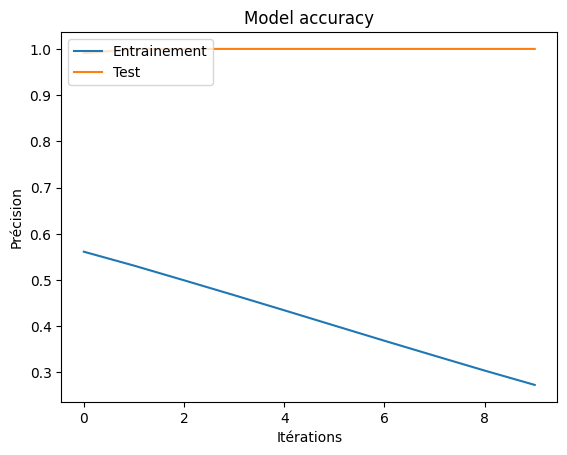

In [ ]:
#l'évolution de la perte et de l'exactitude (ou précision) du modèle pendant l'entraînement.

plt.plot(train.history['loss'])
plt.plot(train.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Précision')
plt.xlabel('Itérations')
plt.legend(['Entrainement', 'Test'], loc='upper left')
plt.show()

#bleu = perte (loss) ; orange = represente l'exactitude(accuracy)

**Prediction sur l'ensemble Test**

In [ ]:

yy_pred = dann.predict(XX_test)
yy_pred = (yy_pred > 0.5)
print(np.concatenate((yy_pred.reshape(len(yy_pred),1), yy_test.reshape(len(yy_test),1)),1))

3/3 [==============================] - 0s 5ms/step
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


**Matrice de confusion**

In [ ]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
cm = confusion_matrix(yy_test, yy_pred)
print(cm)

[[80]]


In [ ]:
#evaluation de l'exactitude du modele ANN
accuracy_score(yy_test, yy_pred)

1.0

**Construction du 2e Modele : SVM**

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:

# Séparer les variables indépendantes (X) et la variable cible (y)
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

In [ ]:
# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalisation des variables
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

#test
#from sklearn.preprocessing import MinMaxScaler
##scaler = MinMaxScaler()
#X_normalized = scaler.fit_transform(X_encoded)


In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
# Créer le modèle SVM
clf = svm.SVC(kernel='linear')

# Entraîner le modèle
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:

# Faire des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

In [ ]:

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle :", accuracy)

Exactitude du modèle : 0.925
